In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [17]:
data_dir = "/kaggle/input/pcos-usg-images/PCOS/"

In [18]:
data_dir = "/kaggle/input/pcos-usg-images/PCOS/"
output_dir = "/kaggle/working/PCOS_organized/" 
os.makedirs(output_dir, exist_ok=True)

class_names = ["infected", "noninfected"]

for split in ["train", "val", "test"]:
    for class_name in class_names:
        os.makedirs(os.path.join(output_dir, split, class_name), exist_ok=True)

for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    images = os.listdir(class_dir)
    
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    val_images, test_images = train_test_split(test_images, test_size=0.5, random_state=42)
    
    for image in train_images:
        src = os.path.join(class_dir, image)
        dst = os.path.join(output_dir, "train", class_name, image)
        shutil.copy(src, dst)
    
    for image in val_images:
        src = os.path.join(class_dir, image)
        dst = os.path.join(output_dir, "val", class_name, image)
        shutil.copy(src, dst)
    
    for image in test_images:
        src = os.path.join(class_dir, image)
        dst = os.path.join(output_dir, "test", class_name, image)
        shutil.copy(src, dst)

print("Data organized into train, val, and test folders.")

Data organized into train, val, and test folders.


In [20]:
train_dir = "/kaggle/working/PCOS_organized/train"
val_dir = "/kaggle/working/PCOS_organized/val"
test_dir = "/kaggle/working/PCOS_organized/test"

img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

print("Train classes:", train_generator.class_indices)
print("Validation classes:", val_generator.class_indices)
print("Test classes:", test_generator.class_indices)


Found 9423 images belonging to 2 classes.
Found 1178 images belonging to 2 classes.
Found 1178 images belonging to 2 classes.
Train classes: {'infected': 0, 'noninfected': 1}
Validation classes: {'infected': 0, 'noninfected': 1}
Test classes: {'infected': 0, 'noninfected': 1}


In [21]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

In [22]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       9,437,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,679,041 (36.92 MB)

 Trainable params: 9,679,041 (36.92 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=10
)

Epoch 1/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 26s 77ms/step - accuracy: 0.8524 - loss: 0.3266 - val_accuracy: 0.9557 - val_loss: 0.1082
Epoch 2/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.9375 - loss: 0.1701 - val_accuracy: 0.9231 - val_loss: 0.1074
Epoch 3/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 23s 76ms/step - accuracy: 0.9687 - loss: 0.0770 - val_accuracy: 0.9774 - val_loss: 0.0566
Epoch 4/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 120us/step - accuracy: 0.9688 - loss: 0.0387 - val_accuracy: 0.9615 - val_loss: 0.5273
Epoch 5/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 22s 74ms/step - accuracy: 0.9800 - loss: 0.0612 - val_accuracy: 0.9905 - val_loss: 0.0366
Epoch 6/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 102us/step - accuracy: 1.0000 - loss: 0.0139 - val_accuracy: 1.0000 - val_loss: 0.0205
Epoch 7/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 22s 72ms/step - accuracy: 0.9872 - loss: 0.0333 - val_accuracy: 0.9887 - val_loss: 0.0372
Epoch 8/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 96us/step - accuracy: 1.0000 - loss: 0.0043 - v

In [24]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9857 - loss: 0.0509
Test Accuracy: 98.56%


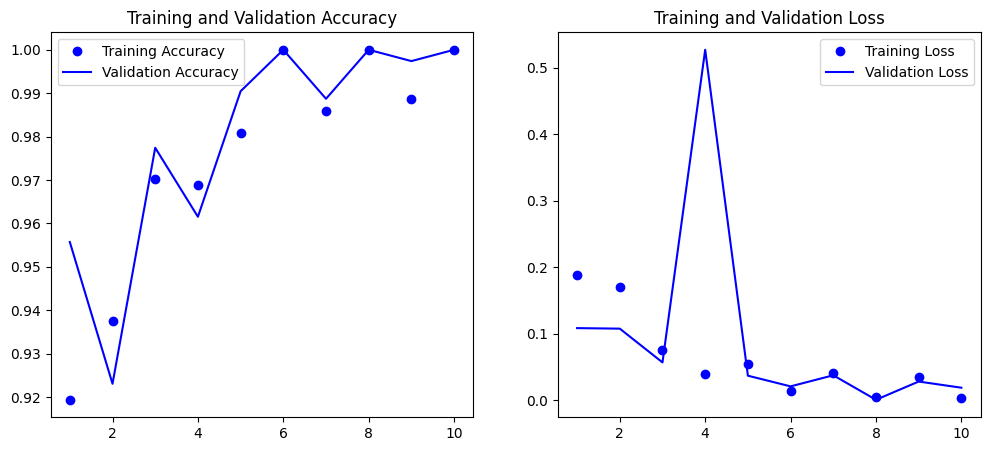

In [25]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

plot_training_history(history)

In [27]:
model.save("pcos_cnn_model.h5")
print("Model saved in SavedModel format.")

Model saved in SavedModel format.
